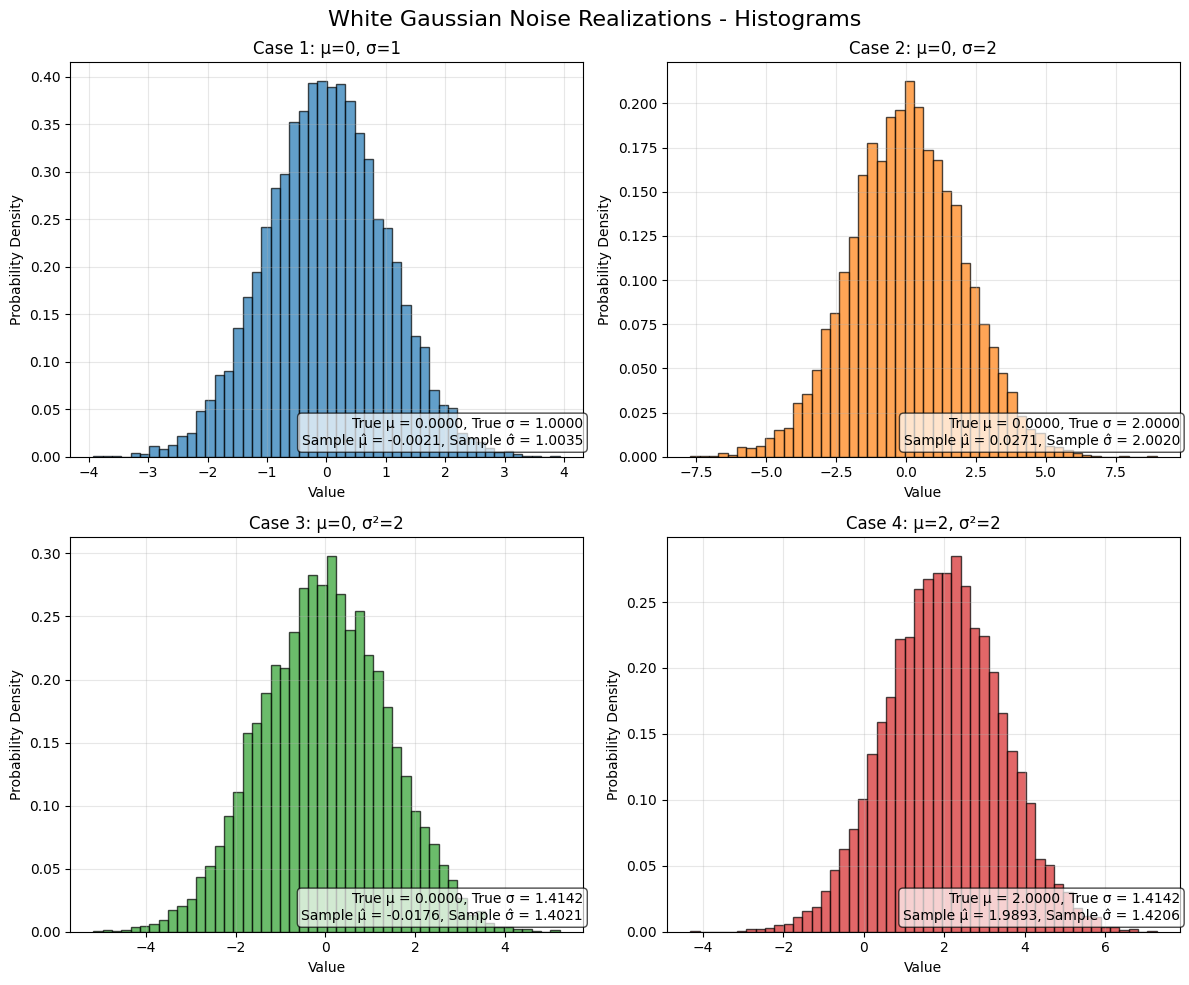

In [2]:
import numpy as np
import matplotlib.pyplot as plt

'Generate and analyze white Gaussian noise (WGN) realizations with different parameters------------'

# Set random seed for reproducibility
np.random.seed(42)
# Number of samples
N = 10000

# Generate WGN realizations with different parameters
# Case 1: μ = 0, σ = 1
mu1, sigma1 = 0, 1
wgn1 = np.random.randn(N) * sigma1 + mu1
# Case 2: μ = 0, σ = 2
mu2, sigma2 = 0, 2
wgn2 = np.random.randn(N) * sigma2 + mu2
# Case 3: μ = 0, σ² = 2 (so σ = √2)
mu3, sigma3_squared = 0, 2
sigma3 = np.sqrt(sigma3_squared)
wgn3 = np.random.randn(N) * sigma3 + mu3
# Case 4: μ = 2, σ² = 2 (so σ = √2)
mu4, sigma4_squared = 2, 2
sigma4 = np.sqrt(sigma4_squared)
wgn4 = np.random.randn(N) * sigma4 + mu4

# Store all realizations and their parameters for analysis
realizations = [wgn1, wgn2, wgn3, wgn4]
parameters = [
    (0, 1, "μ=0, σ=1"),
    (0, 2, "μ=0, σ=2"),
    (0, np.sqrt(2), "μ=0, σ²=2"),
    (2, np.sqrt(2), "μ=2, σ²=2")
]

# Create subplots for histograms
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('White Gaussian Noise Realizations - Histograms', fontsize=16)
axes = axes.flatten()# Flatten axes array for easier indexing

# Analyze each realization
for i, (wgn, (mu_true, sigma_true, label)) in enumerate(zip(realizations, parameters)):
    # Calculate sample statistics
    sample_mean = np.mean(wgn)
    sample_std = np.std(wgn, ddof=1)  # Using ddof=1 for sample standard deviation

    # Create histogram
    axes[i].hist(wgn, bins=50, density=True, alpha=0.7, color=f'C{i}', edgecolor='black')
    axes[i].set_title(f'Case {i+1}: {label}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Probability Density')
    axes[i].grid(True, alpha=0.3)
    axes[i].text(1, 0.1, f"True μ = {mu_true:.4f}, True σ = {sigma_true:.4f}\nSample μ̂ = {sample_mean:.4f}, Sample σ̂ = {sample_std:.4f}",
            transform=axes[i].transAxes, fontsize=10, ha='right', va='top',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))
    
plt.tight_layout()
plt.show()


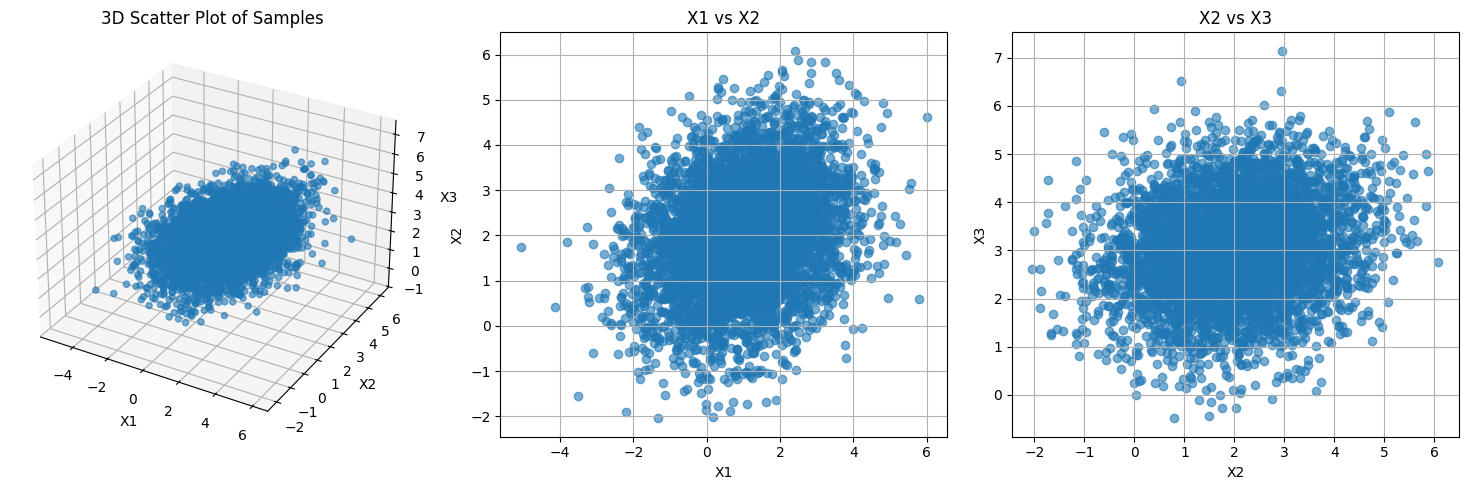

In [3]:
import numpy as np
import matplotlib.pyplot as plt

'Generate the trivariate normal distribution with given covariance------------'

def generate_trivariate_normal(mean, cov, n_samples=1000):
    # Compute the transformation matrix A using Cholesky decomposition
    # A * A^T = C, so A = cholesky(C)
    A = np.linalg.cholesky(cov)
    
    # Generate independent standard normal variables
    # X1, X2, X3 ~ N(0, 1) independently
    X = np.random.randn(3, n_samples) 
    
    # Apply linear transformation: Y = μ + A * X
    Y = mean[:, np.newaxis] + A @ X
    
    # Transpose to get n_samples x 3 format
    samples = Y.T
    
    return samples, A

def plot_results(samples, true_mean, true_cov):
    fig = plt.figure(figsize=(15, 5))
    
    # 3D scatter plot
    ax1 = fig.add_subplot(131, projection='3d')
    ax1.scatter(samples[:, 0], samples[:, 1], samples[:, 2], alpha=0.6)
    ax1.set_xlabel('X1')
    ax1.set_ylabel('X2')
    ax1.set_zlabel('X3')
    ax1.set_title('3D Scatter Plot of Samples')
    
    # Pairwise scatter plots
    ax2 = fig.add_subplot(132)
    ax2.scatter(samples[:, 0], samples[:, 1], alpha=0.6)
    ax2.set_xlabel('X1')
    ax2.set_ylabel('X2')
    ax2.set_title('X1 vs X2')
    ax2.grid(True)
    
    ax3 = fig.add_subplot(133)
    ax3.scatter(samples[:, 1], samples[:, 2], alpha=0.6)
    ax3.set_xlabel('X2')
    ax3.set_ylabel('X3')
    ax3.set_title('X2 vs X3')
    ax3.grid(True)
    
    plt.tight_layout()
    plt.show()

# Define parameters for the trivariate normal distribution
mean = np.array([1.0, 2.0, 3.0])
# Example covariance matrix 
cov = np.array([
    [2.0, 0.5, 0.3],
    [0.5, 1.5, 0.2],
    [0.3, 0.2, 1.0]
])

samples, A = generate_trivariate_normal(mean, cov, n_samples=5000)# Generate samples

plot_results(samples, mean, cov)# Plot the results


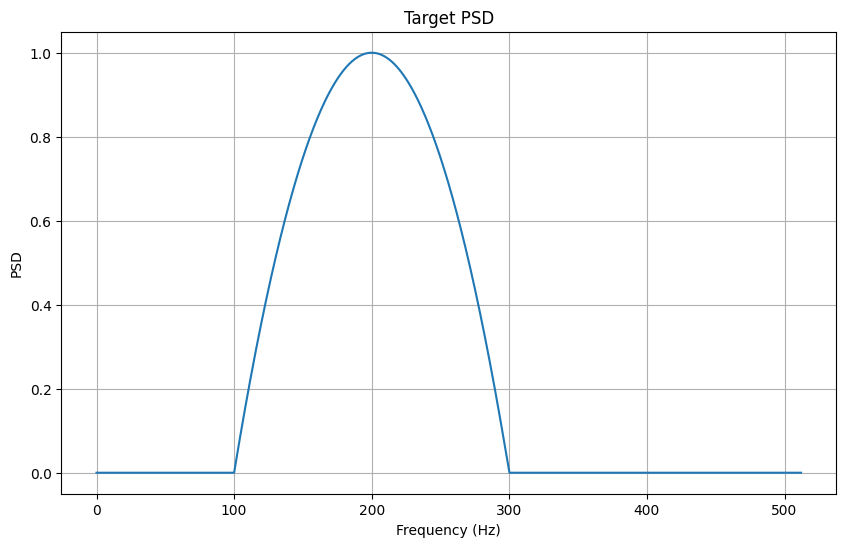

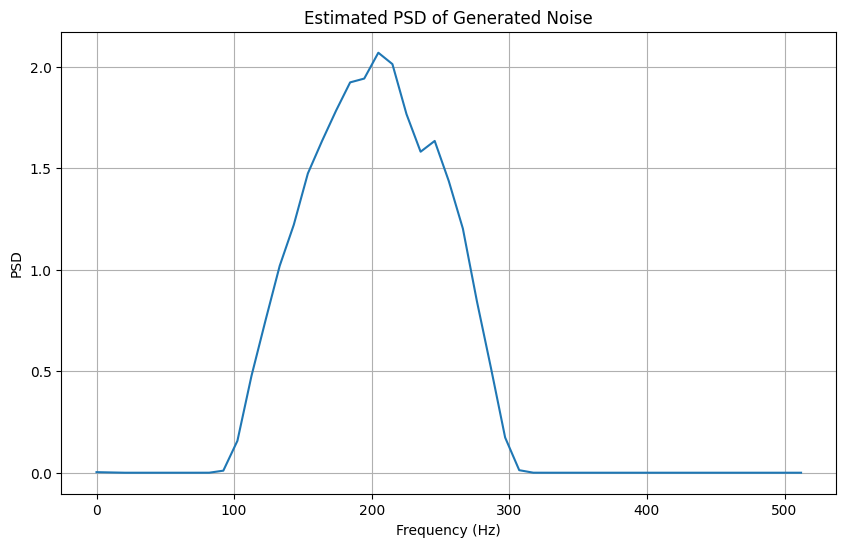

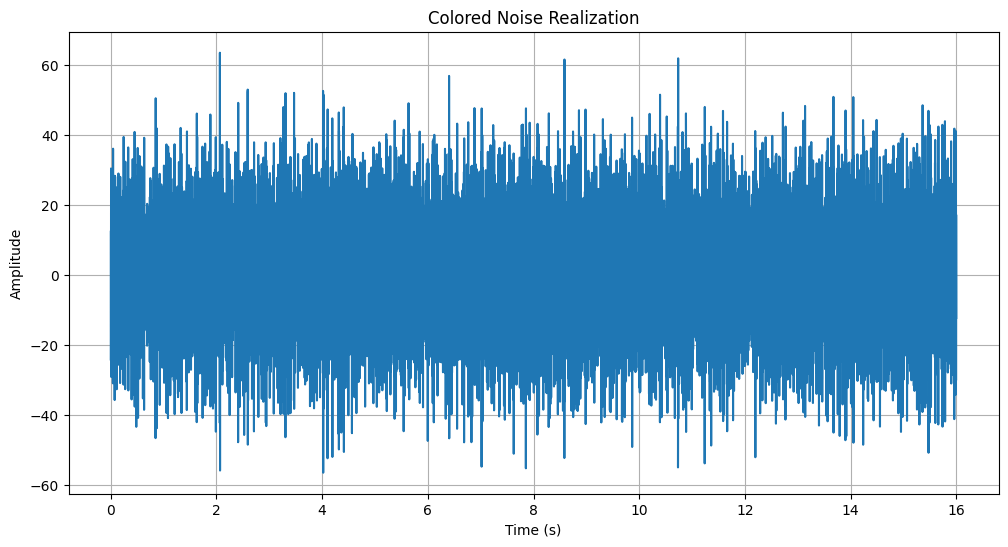

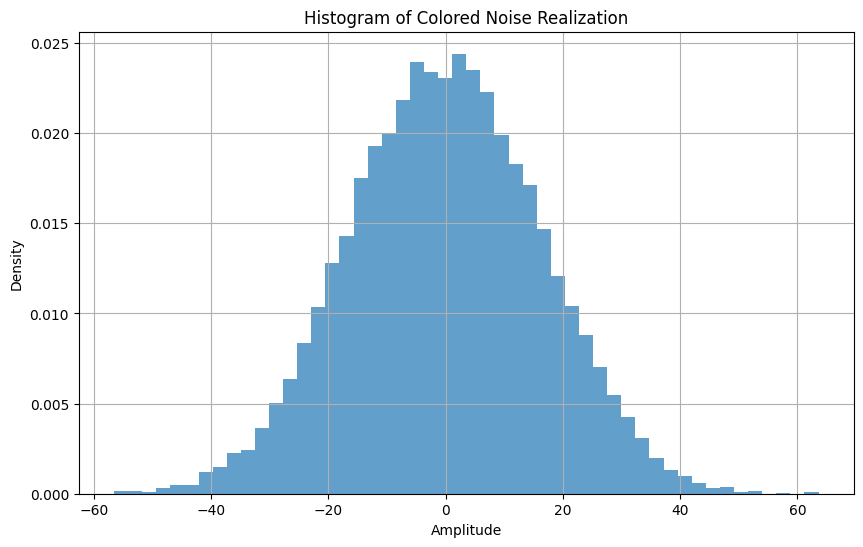

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

'Generate and analyze Colored Gaussian noise realization with given 2-sided PSD------------'

def colorednoisegeneration(n_samples, psd_vals, fltr_order, samp_freq):
    """
    Generate a realization of stationary Gaussian noise with given 2-sided PSD
    
    Parameters:
    n_samples : int
        Number of samples to generate
    psd_vals : array-like, shape (M, 2)
        Matrix containing frequencies and corresponding PSD values
        First column: frequencies, Second column: PSD values
        Frequencies must start from 0 and end at Fs/2
    fltr_order : int
        Order of the FIR filter to be used
    samp_freq : float
        Sampling frequency
        
    Returns:
    out_noise : ndarray
        Generated colored noise realization
    """
    
    # Design FIR filter with T(f) = square root of target PSD
    freq_vec = psd_vals[:, 0]
    sqrt_psd = np.sqrt(psd_vals[:, 1])

    
    # Design FIR filter using firwin2 
    b = signal.firwin2(fltr_order + 1, freq_vec, sqrt_psd, fs=samp_freq)
    
    # Generate white Gaussian noise realization
    in_noise = np.random.randn(n_samples)
    
    # Pass through the designed filter and scale
    out_noise = np.sqrt(samp_freq) * signal.fftconvolve(in_noise,b, mode='same')
    return out_noise

# Demo for colored Gaussian noise generation
# Sampling frequency for noise realization
samp_freq = 1024  # Hz

# Number of samples to generate
n_samples = 16384

# Time samples
time_vec = np.arange(n_samples) / samp_freq

# Target two-sided PSD given by the function
def target_psd(f):
    return np.where((f >= 100) & (f <= 300), (f - 100) * (300 - f) / 10000, 0)

# Plot PSD
freq_vec = np.arange(0, 512.1, 0.1)
psd_vec = target_psd(freq_vec)

plt.figure(figsize=(10, 6))
plt.plot(freq_vec, psd_vec)
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD')
plt.title('Target PSD')
plt.grid(True)
plt.show()

# Filter order
fltr_order = 500

# Generate noise realization
psd_vals = np.column_stack([freq_vec, psd_vec])
out_noise = colorednoisegeneration(n_samples, psd_vals, fltr_order, samp_freq)

# Estimate the PSD using Welch's method
f, pxx = signal.welch(out_noise, samp_freq, nperseg=100) # note:welch uses 1-sided PSD, and the default nperseg=256

# Plot the estimated PSD
plt.figure(figsize=(10, 6))
plt.plot(f, pxx)
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD')
plt.title('Estimated PSD of Generated Noise')
plt.grid(True)
plt.show()

# Plot the colored noise realization
plt.figure(figsize=(12, 6))
plt.plot(time_vec, out_noise)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Colored Noise Realization')
plt.grid(True)
plt.show()


#Plot the histogram of the noise realization
plt.figure(figsize=(10, 6))
plt.hist(out_noise, bins=50, density=True, alpha=0.7)

plt.xlabel('Amplitude')
plt.ylabel('Density')
plt.title('Histogram of Colored Noise Realization')
plt.grid(True)
plt.show()
